In [8]:
from JAXbase import *
from NUMPYbase import *
import time
#import matplotlib.pyplot as plt

## Comparacion tiempos

In [9]:
Hz = jnp.linspace(0.0, 10, 1501)
times = []
for i in [1, 10, 100, 1000, 10000]:
      print(i)
      T =  jnp.linspace(1, 10, i)

      start = time.time()
      PhaseJAXIso = []
      for l,h in enumerate(Hz):
            H = JAXhamiltoniano([1.49, 0.5, h])
            ee1, vv1= JAXget_eigen(H)
            aux = vec_JAXSpecific_heat(ee1, T)
            PhaseJAXIso.append( aux )
      end = time.time()
      times.append( (end-start)*1000 )

1
10
100
1000
10000


In [10]:
Hz = jnp.linspace(0.0, 10, 1501)
timesNumpy = []
for i in [1, 10, 100, 1000, 10000]:
      print(i)
      start = time.time()
      T =  jnp.linspace(1, 10, i)

      PhaseNUMPYIso = []
      for l,h in enumerate(Hz):
            H = Numpyhamiltoniano([1.49, 0.5, h])
            ee1, vv1= Numpyget_eigen(H)
            aux = [ NumpySpecific_heat(ee1, t)for t in T ]
            PhaseNUMPYIso.append( aux )
      end = time.time()
      timesNumpy.append( (end-start)*1000 )

1
10
100
1000
10000


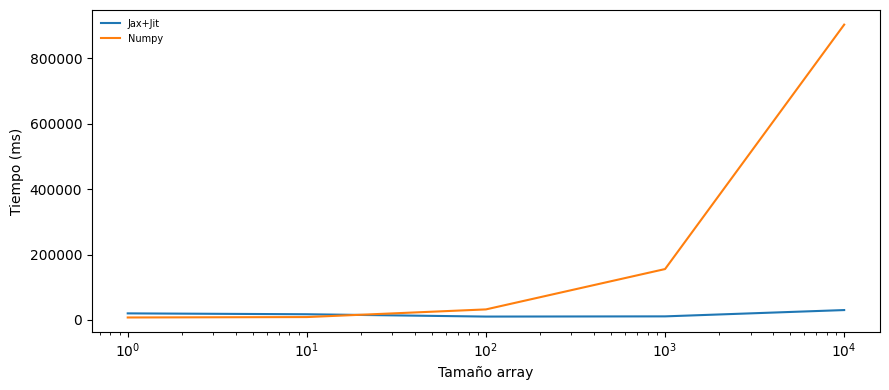

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(9,4),)
x = [1, 10, 100, 1000, 10000]
ax.plot(x, times, label="Jax+Jit")
ax.plot(x, timesNumpy, label="Numpy")

ax.set_ylabel("Tiempo (ms)")
ax.set_xlabel("Tamaño array")
ax.set_xscale("log")
ax.legend(edgecolor="k", ncol=1, frameon=False, loc="upper left",
          markerscale=1.2, fontsize=7)
fig.tight_layout()
plt.show()

## Calidad Solucion

In [14]:
Hz = jnp.linspace(0.0, 10, 1501)
T = jnp.linspace(1, 10, 1001)

PhaseJAXIso = []
for l,h in enumerate(Hz):
    H = JAXhamiltoniano([1.49, 0.5, h])
    ee1, vv1= JAXget_eigen(H)
    aux = vec_JAXSpecific_heat(ee1, T)
    PhaseJAXIso.append( aux )

In [16]:
Hz = np.linspace(0.0, 10, 1501)
T = np.linspace(1,10, 1001)
PhaseNUMPYIso = []
for l,h in enumerate(Hz):
    H = Numpyhamiltoniano([1.49, 0.5, h])
    ee1, vv1= Numpyget_eigen(H)
    aux = [ NumpySpecific_heat(ee1, t)for t in T ]
    PhaseNUMPYIso.append( aux )

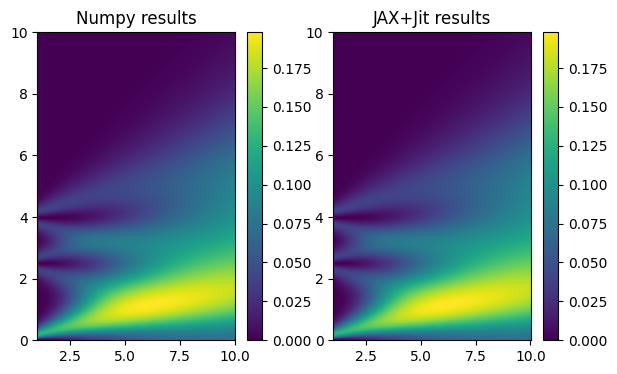

In [17]:
import matplotlib.pyplot as plt

Hz = np.linspace(0.0, 10, 1501)
T = np.linspace(1,10, 1001)

fig, ax = plt.subplots(1, 2, figsize=(7,4),)

im1 = ax[0].pcolormesh(T, Hz, PhaseNUMPYIso)
ax[0].set_title("Numpy results")
plt.colorbar(im1)

im1 = ax[1].pcolormesh(T, Hz, PhaseJAXIso)
ax[1].set_title("JAX+Jit results")
plt.colorbar(im1)